In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df = pd.read_csv('/content/drive/MyDrive/Smart_City_index_headers.csv')

df.head()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


In [102]:
df.info()

print("How many missing values does it have:", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Id                                 102 non-null    int64 
 1   City                               102 non-null    object
 2   Country                            102 non-null    object
 3   Smart_Mobility                     102 non-null    int64 
 4   Smart_Environment                  102 non-null    int64 
 5   Smart_Government                   102 non-null    int64 
 6   Smart_Economy                      102 non-null    int64 
 7   Smart_People                       102 non-null    int64 
 8   Smart_Living                       102 non-null    int64 
 9   SmartCity_Index                    102 non-null    int64 
 10  SmartCity_Index_relative_Edmonton  102 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.9+ KB
How many missing values do

Запознавање со податочното множество, од каков тип на податоци се состои и дали има missing values.

In [103]:
df.drop('Id',axis=1,inplace=True)
df.head()

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


Колоната id се дропнува, за да добиеме поголема прецизност.

In [104]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['City'] = encoder.fit_transform(df['City'])
df['Country'] = encoder.fit_transform(df['Country'])

df.head()


,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,65,22,6480,6512,7516,4565,8618,9090,7138,666
1,11,22,7097,6876,7350,4905,8050,9090,7296,823
2,4,20,7540,5558,8528,8095,7098,7280,7311,839
3,24,6,7490,7920,8726,5580,5780,7200,7171,698
4,82,30,6122,7692,8354,4330,6743,7730,6812,340


Енкодирање на колоните City и Country во нумерички вредности со LabelEncoder. На овој начин моделите ќе работат без никаква препрека.

In [105]:
from sklearn.model_selection import train_test_split

X = df.drop('SmartCity_Index',axis = 1)
y = df['SmartCity_Index']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Поделба на податочното множество

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

model_rf = RandomForestRegressor()
model_svr = SVR(epsilon=0.2,C=1)
model_linear = LinearRegression()
model_ridge = Ridge(alpha=1)


In [108]:
model_rf.fit(X_train_scaled, y_train)
model_svr.fit(X_train_scaled, y_train)
model_linear.fit(X_train_scaled, y_train)
model_ridge.fit(X_train_scaled, y_train)

pred_rf = model_rf.predict(X_test_scaled)
pred_svr = model_svr.predict(X_test_scaled)
pred_linear = model_linear.predict(X_test_scaled)
pred_ridge = model_ridge.predict(X_test_scaled)

In [109]:
from sklearn.metrics import r2_score

accuracy_score_rf = r2_score(y_test, pred_rf)
accuracy_score_svr = r2_score(y_test, pred_svr)
accuracy_score_linear = r2_score(y_test, pred_linear)
accuracy_score_ridge = r2_score(y_test, pred_ridge)

print(f"Random Forest Accuracy:{accuracy_score_rf}")
print(f"SVR Accuracy:{accuracy_score_svr}")
print(f"Linear Regression Accuracy:{accuracy_score_linear}")
print(f"RIDGE Accuracy:{accuracy_score_ridge}")

Random Forest Accuracy:0.9979692032510068
SVR Accuracy:-0.03718969484157619
Linear Regression Accuracy:0.9999999146020471
RIDGE Accuracy:0.9999623729116638


Во сите претходни чекори се одвиваше тренирањето на моделот,стандардизација на податоци и споредување на добиените резултати со R2_score. Поради малиот број на податоци, можеме да воочиме дека скоро сите модели дадоа добри резултати, освен Support Vector Regressor(најверојатно поради не подесените параметри). Па доколку треба да предвидуваме SmartCityIndex и ѓи имаме сите потребни податоци може да искористиме Линеарна Регресија која дава ~100% прецизност, во интерес на едноставноста.

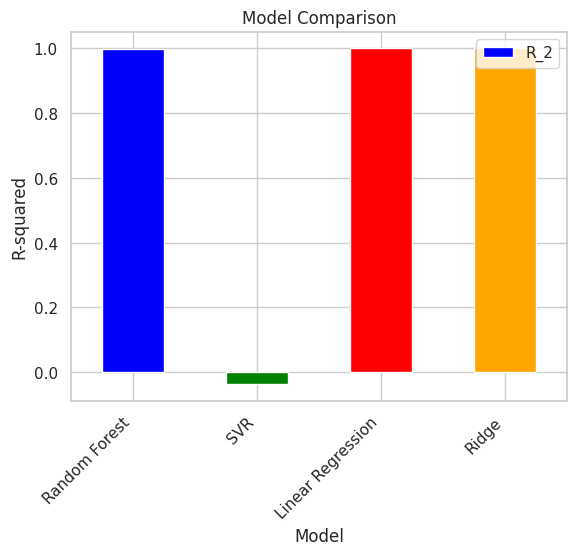

In [110]:
results_df = pd.DataFrame({
    'Model':['Random Forest', 'SVR', 'Linear Regression','Ridge'],
    'R_2': [accuracy_score_rf,accuracy_score_svr,accuracy_score_linear,accuracy_score_ridge],
    'Color': ['blue','green','red','orange']
})

results_df.plot(x='Model', y='R_2', kind='bar', color=results_df['Color'])
plt.ylabel('R-squared')
plt.xticks(rotation = 45,ha='right')
plt.title('Model Comparison')
plt.show()

Визуелизација за прецизноста преку plotbar, можеме да воочиме дека не би згрешиле со одбир на еден од трите модели.

<ipython-input-111-ce25d8ebc022>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='SmartCity_Index',data = df,palette='viridis')


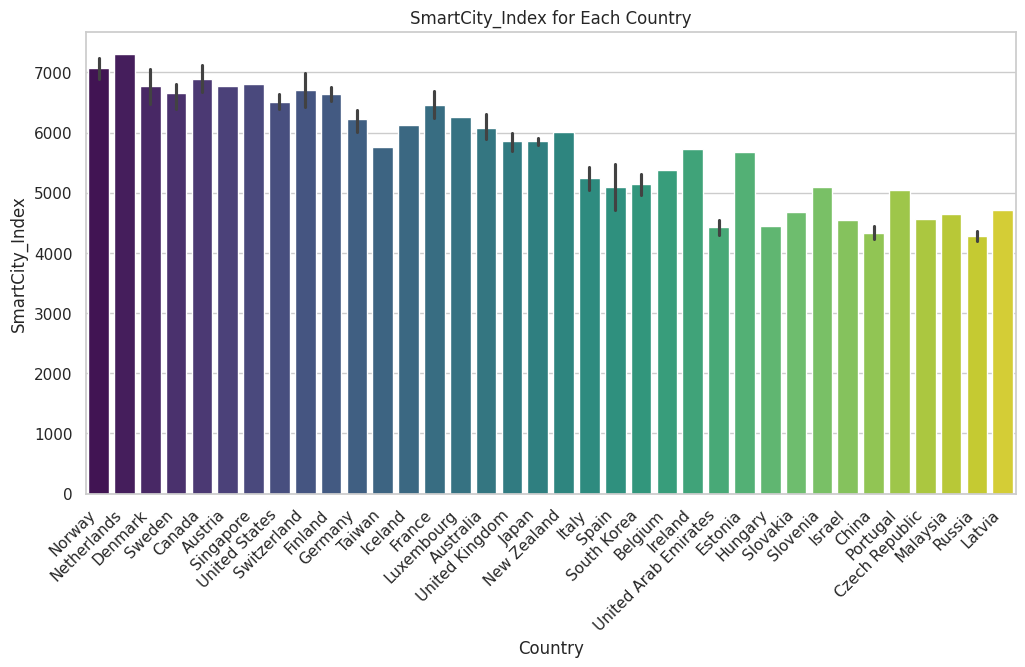

In [111]:
df['Country'] = encoder.inverse_transform(df['Country'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='SmartCity_Index',data = df,palette='viridis')
plt.xlabel('Country')
plt.ylabel('SmartCity_Index')
plt.title('SmartCity_Index for Each Country')

plt.xticks(rotation=45, ha='right')

plt.show()

Овде извршив инверзно енкодирање за враќање на првобитните Стринг репрезентации на државите, каде е прикажан Смарт индексот за секоја од нив.

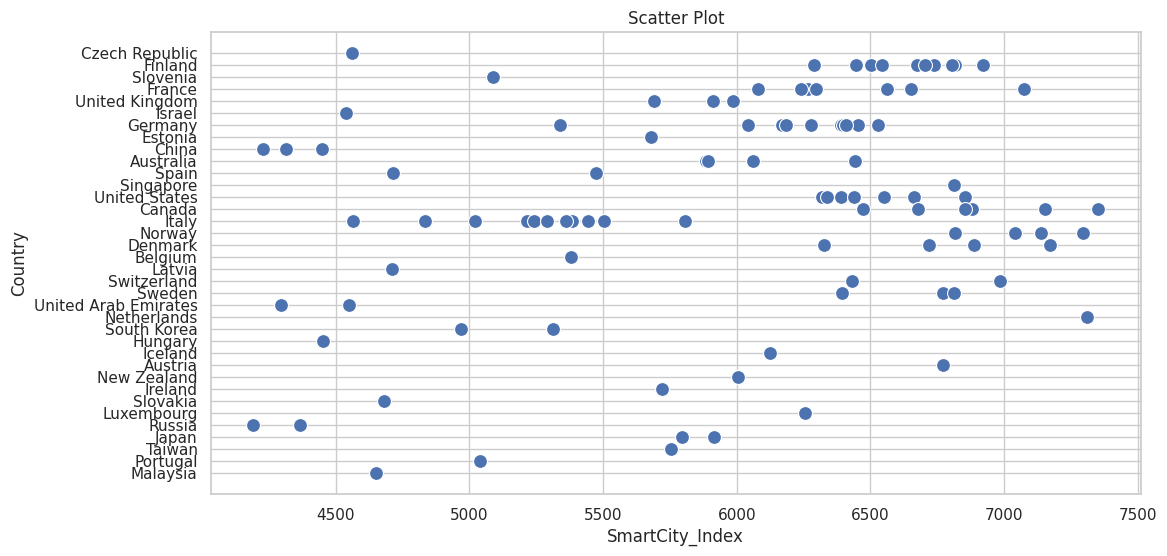

In [121]:
from sklearn.utils import shuffle
df = shuffle(df)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='SmartCity_Index', y='Country', data=df,s=100)
plt.xlabel('SmartCity_Index')
plt.ylabel('Country')
plt.title('Scatter Plot')

plt.show()

Овде се прикажани податоците преку scatterplots каде направив да бидат распоредени shuffle, наместо аscending, за по реално прикажување.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

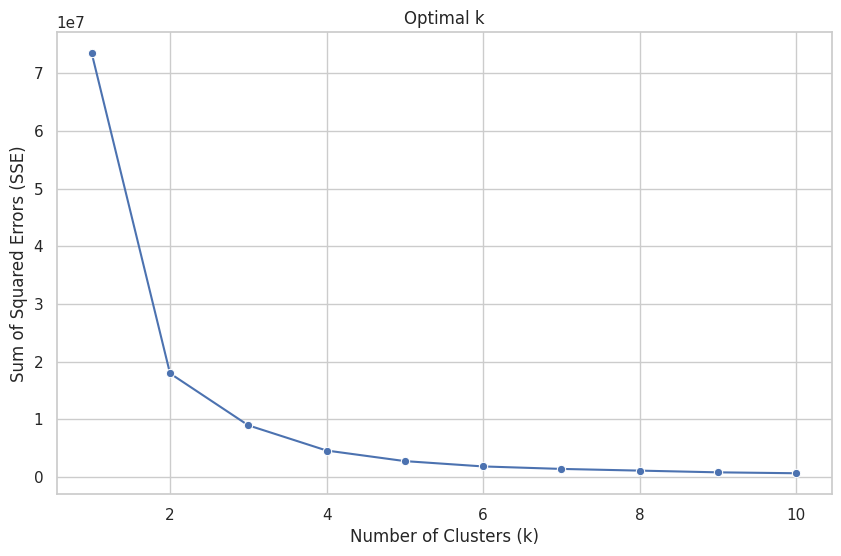

In [116]:
from sklearn.cluster import KMeans

X = df['SmartCity_Index']
X = X.values.reshape(-1,1)

sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=sse, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Optimal k')
plt.grid(True)

plt.show()

Тука можеме да видеме кој би бил оптималниот број на клустери. Во листа се ставаат резултатите од SSЕ a подоцна од графиконот се гледаат нејзините резултати во однос на k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


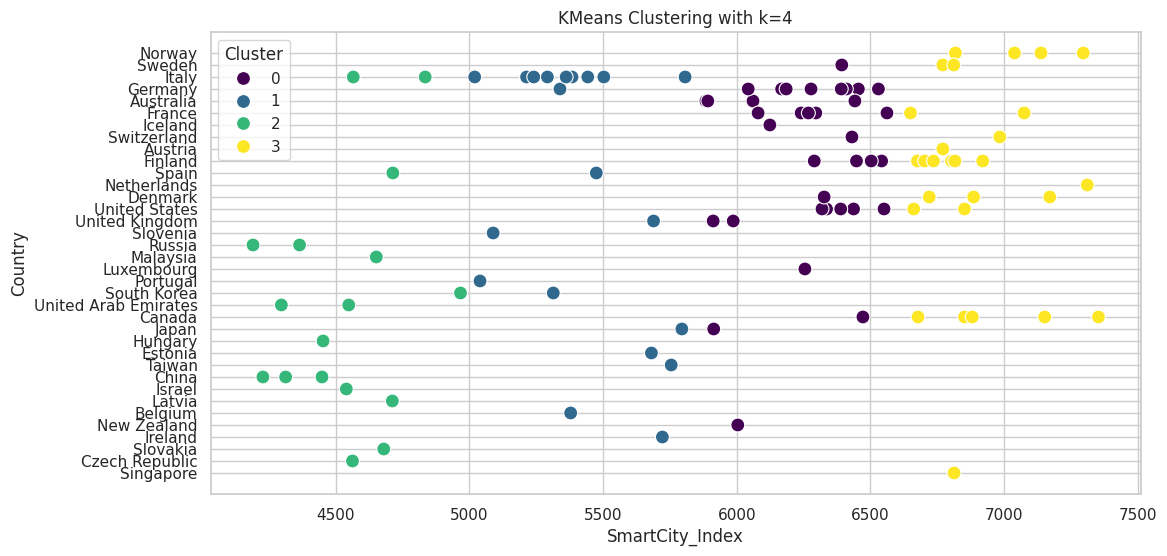

In [119]:
from sklearn.utils import shuffle

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['SmartCity_Index'], y=df['Country'], hue=df['Cluster'], palette='viridis', edgecolor='w', s=100)
plt.xlabel('SmartCity_Index')
plt.title('KMeans Clustering with k=4')
plt.legend(title='Cluster', loc='upper left')

plt.show()

In [123]:
last_cluster_data = df[df['Cluster'] == 3]

min_smart_city_value = last_cluster_data['SmartCity_Index'].min()

print(f"Minimum 'SmartCity_Index' in the last cluster: {min_smart_city_value}")

Minimum 'SmartCity_Index' in the last cluster: 6650


In [127]:
selected_countries = last_cluster_data[last_cluster_data['SmartCity_Index'] > 6650]

unique_countries = selected_countries['Country'].unique()

print("Unique countries in the last cluster")
print(unique_countries)

Unique countries in the last cluster
['Finland' 'Singapore' 'Canada' 'Norway' 'United States' 'Sweden'
 'Netherlands' 'France' 'Austria' 'Denmark' 'Switzerland']


За 4 кластери ги добивме следните резултати.Можеме да воочиме дека државите сo жолта боја на точки придонесуваат повеќе во концептот на Паметни градови. Па на овај начин можат да се таргетираат државите со зелена,сина и лилава боја за развој на поголема свест во изградбата на Паметни градови. Во последниот дел се сите држави кој имаат најголем индекс и служат за пример на останатите.

                                          Кристијан Бошев 203159